In [11]:
from sokoban import Map, save_images, create_gif
from search_methods.beam_search import BeamSearch
from search_methods.lrta_star import LrtaStar
from search_methods.heuristics import min_weight_manhattan
from search_methods.heuristics import min_weight_manhattan_with_player
from search_methods.heuristics import min_weight_bfs
from search_methods.heuristics import min_weight_bfs_with_player
from search_methods.heuristics import min_weight_euclidean as euclid
import matplotlib.pyplot as plt

import time

# Inits
- Starter maps are found in /images/init_maps

In [12]:
""" 
	Store the maps from the .yaml files, organizing them in a map based on their
	advertised difficulty level. 
	Each key will have a corresponding tuple containing the map object and its name as a string
"""
EASY = 'easy'
MEDIUM = 'medium'
HARD = 'hard'
SUPER_HARD = 'super_hard'
LARGE = 'large'
MAP = 1
MAP_NAME = 0

heuristics = [euclid, min_weight_manhattan, min_weight_manhattan_with_player, min_weight_bfs, min_weight_bfs_with_player]

def create_steps_images(steps_path, map_name, heur_name, algo_name):
	""" 
		Creates images for each step in the solution and returns their path
	"""
	for i in range(len(steps_path)):
		map = steps_path[i]
		map.save_map(f'images/{map_name}/{algo_name}/{heur_name}/steps', f'{str(i)}')
	return f'images/{map_name}/{algo_name}/{heur_name}/steps'

maps = {}
for difficulty in [EASY, MEDIUM, HARD, SUPER_HARD, LARGE]:
	maps[difficulty] = []
	for i in range(1, 3):
		# There's only one super_hard map
		if difficulty == 'super_hard' and i == 2:
			continue
		map_name = f'{difficulty}_map{str(i)}'
		map_tuple = (map_name, Map.from_yaml(f'tests/{map_name}.yaml'))
		maps[difficulty].append(map_tuple)

for difficulty in [EASY, MEDIUM, HARD, SUPER_HARD, LARGE]:
	for map_tuple in maps[difficulty]:
		map = map_tuple[MAP]
		# remove the .yaml extension
		map_name = map_tuple[MAP_NAME].replace('.yaml', '')
		map.save_map('images/init_maps', map_name)

# Beam-Search

In [13]:
print('#=======================================================================#')

beam_search_runtimes = {}
beam_search_explored_states = {}

for heuristic in heuristics:
	for difficulty in [EASY, MEDIUM, HARD, SUPER_HARD, LARGE]:
		for map_tuple in maps[difficulty]:
			beam_width = 15
			solver = BeamSearch(map_tuple[MAP], beam_width, heuristic, allow_pulls=False)
			print(f"------------ Heuristic: {heuristic.__name__} ----------")
			# time the solver
			start_time = time.time()
			solution_path = solver.solve()
			end_time = time.time()
			if not beam_search_runtimes.get(map_tuple[MAP_NAME]):
				beam_search_runtimes[map_tuple[MAP_NAME]] = {}
			beam_search_runtimes[map_tuple[MAP_NAME]][heuristic.__name__] = end_time - start_time

			if solution_path is not None:
				print(f"map: {map_tuple[MAP_NAME]}")
				print(f"Beam width: {beam_width}")
				print(f'Total pull moves: {str(solution_path[-1].undo_moves)}')
				#images_path = create_steps_images(solution_path, map_tuple[MAP_NAME], heuristic.__name__, "beam_search")
				#gif_save_path = images_path.replace('steps', '')
				#create_gif(images_path, 'animated', gif_save_path)
				if not beam_search_explored_states.get(map_tuple[MAP_NAME]):
					beam_search_explored_states[map_tuple[MAP_NAME]] = []
				beam_search_explored_states[map_tuple[MAP_NAME]].append(solver.explored_states)
			else:
				print(f"Solution not found for {map_tuple[MAP_NAME]}")
			print('#=======================================================================#')


print('#=======================================================================#')

#=======================================================================#
------------ Heuristic: min_weight_euclidean ----------
Goal state found!
Explored states: 169
Reconstructed path size: 20
map: easy_map1
Beam width: 15
Total pull moves: 0
#=======================================================================#
------------ Heuristic: min_weight_euclidean ----------
Goal state found!
Explored states: 92
Reconstructed path size: 10
map: easy_map2
Beam width: 15
Total pull moves: 0
#=======================================================================#
------------ Heuristic: min_weight_euclidean ----------
Goal state found!
Explored states: 251
Reconstructed path size: 22
map: medium_map1
Beam width: 15
Total pull moves: 0
#=======================================================================#
------------ Heuristic: min_weight_euclidean ----------
Goal state found!
Explored states: 345
Reconstructed path size: 33
map: medium_map2
Beam width: 15
Total pull moves: 0
#========

# LRTA*

In [14]:
print('#=======================================================================#')

lrta_star_total_steps = {}
lrta_star_pull_moves = {}
lrta_runtimes = {}

for heuristic in heuristics:
	for difficulty in [EASY, MEDIUM, HARD, SUPER_HARD, LARGE]:
		for map_tuple in maps[difficulty]:
			solver = LrtaStar(map_tuple[MAP], heuristic, allow_pulls=True)
			print(f"------------ Heuristic: {heuristic.__name__} -----------")
			# time the solver
			start_time = time.time()
			solution_path = solver.solve()
			end_time = time.time()

			if not lrta_runtimes.get(map_tuple[MAP_NAME]):
				lrta_runtimes[map_tuple[MAP_NAME]] = {}
			lrta_runtimes[map_tuple[MAP_NAME]][heuristic.__name__] = end_time - start_time
			
			if solution_path is not None:
				print(f"Map: {map_tuple[MAP_NAME]}")
				print(f"Total steps: {len(solution_path)}")
				print(f'Total pull moves: {solution_path[-1].undo_moves}')
				#images_path = create_steps_images(solution_path, map_tuple[MAP_NAME], heuristic.__name__, "lrta_star")
				#gif_save_path = images_path.replace('steps', '')
				#create_gif(images_path, 'animated', gif_save_path)
				if not lrta_star_total_steps.get(map_tuple[MAP_NAME]):
					lrta_star_total_steps[map_tuple[MAP_NAME]] = []
				lrta_star_total_steps[map_tuple[MAP_NAME]].append(len(solution_path))
				if not lrta_star_pull_moves.get(map_tuple[MAP_NAME]):
					lrta_star_pull_moves[map_tuple[MAP_NAME]] = []

				lrta_star_pull_moves[map_tuple[MAP_NAME]].append(solution_path[-1].undo_moves)
			else:
				print(f"Solution not found for {map_tuple[MAP_NAME]}")
			print('#=======================================================================#')

print('#=======================================================================#')



#=======================================================================#
------------ Heuristic: min_weight_euclidean -----------
LRTA* found a goal solution
Map: easy_map1
Total steps: 50
Total pull moves: 0
#=======================================================================#
------------ Heuristic: min_weight_euclidean -----------
LRTA* found a goal solution
Map: easy_map2
Total steps: 18
Total pull moves: 0
#=======================================================================#
------------ Heuristic: min_weight_euclidean -----------
LRTA* found a goal solution
Map: medium_map1
Total steps: 567
Total pull moves: 0
#=======================================================================#
------------ Heuristic: min_weight_euclidean -----------
LRTA* found a goal solution
Map: medium_map2
Total steps: 941
Total pull moves: 3
#=======================================================================#
------------ Heuristic: min_weight_euclidean -----------
LRTA* found a goal solu

# Plots

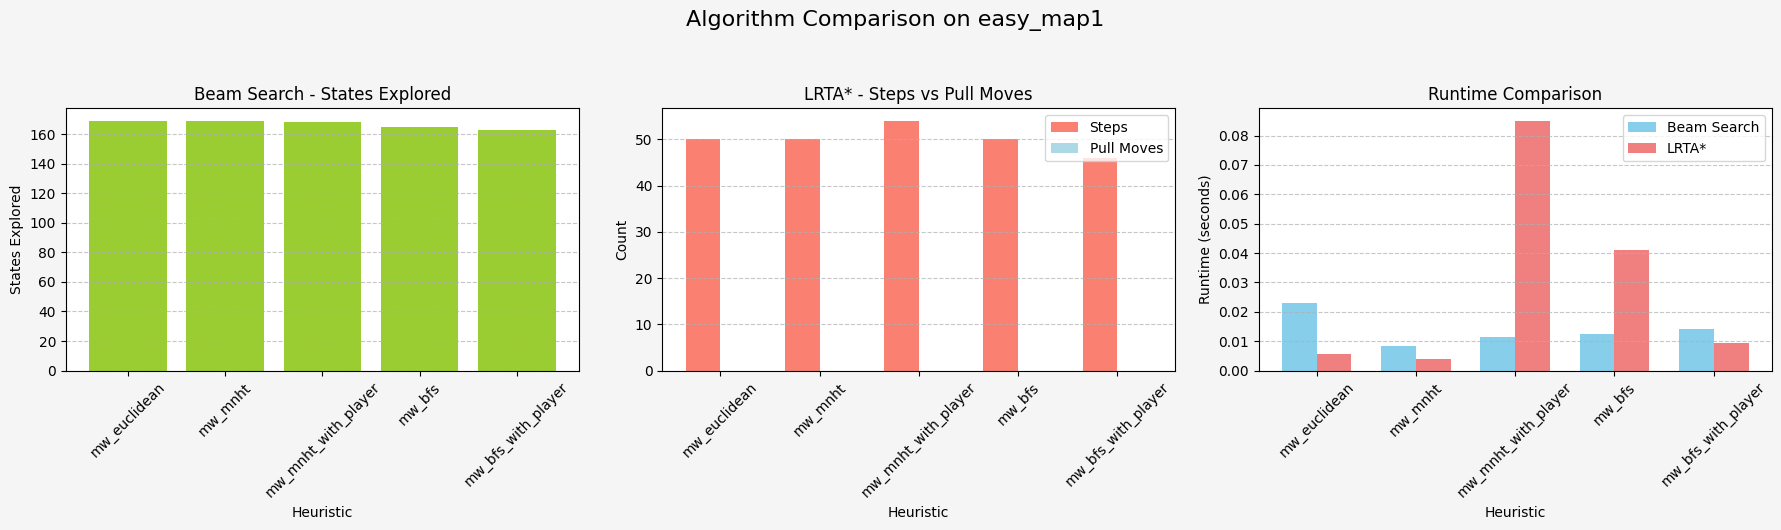

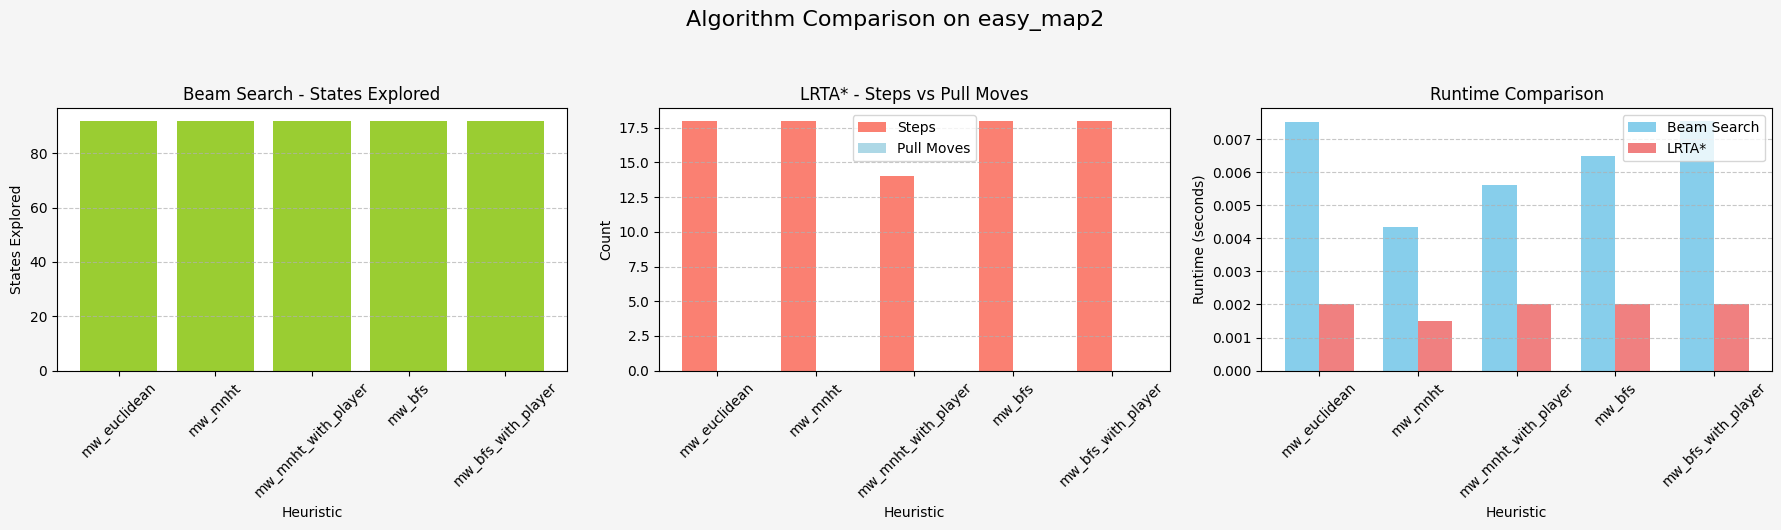

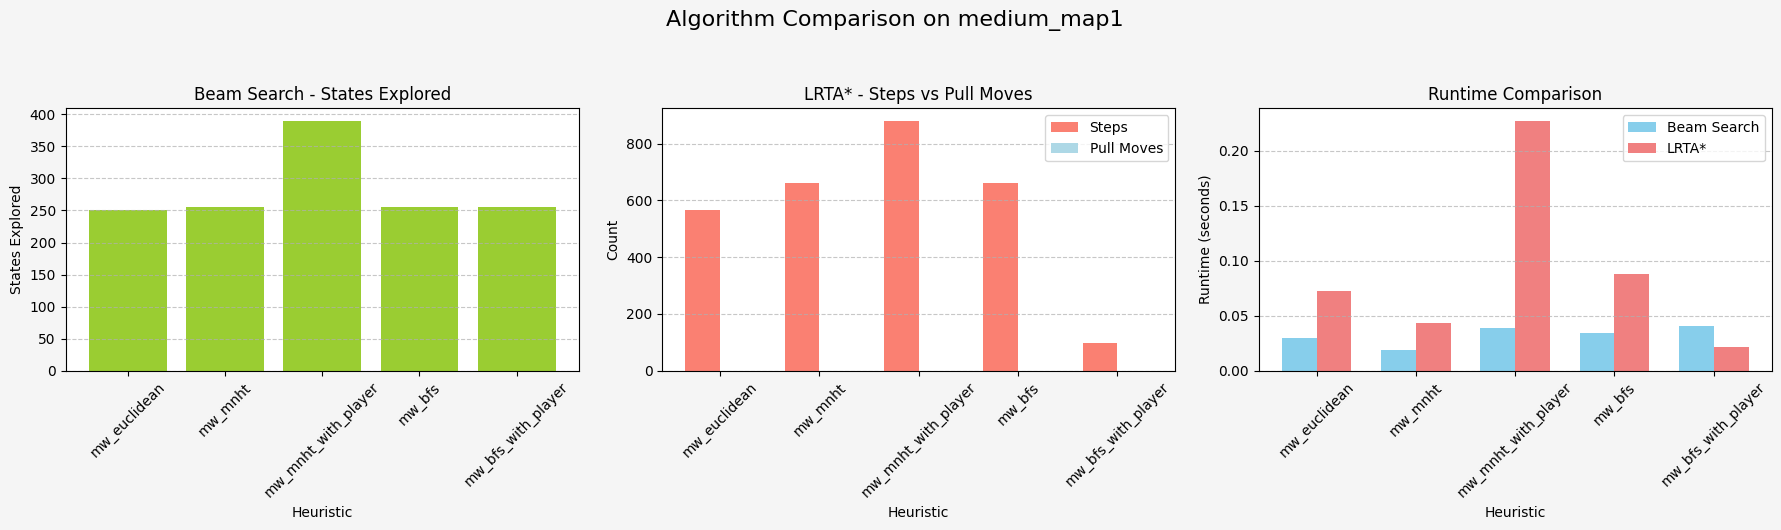

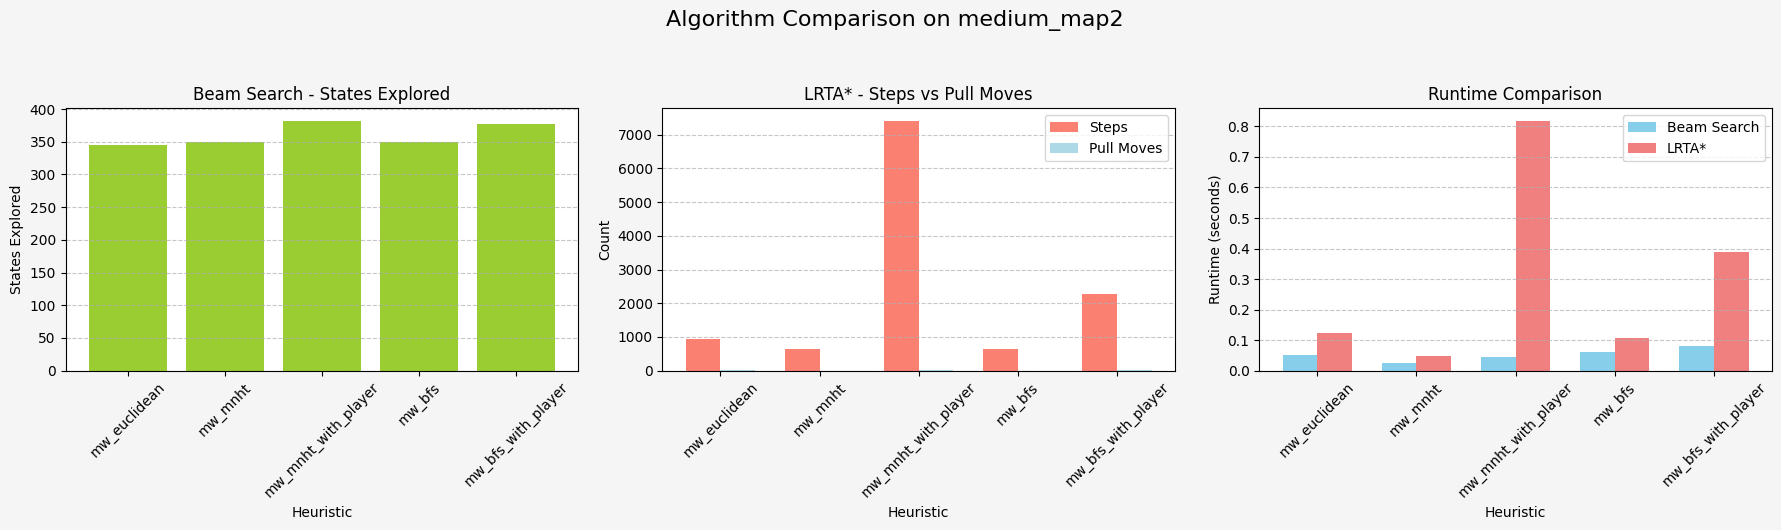

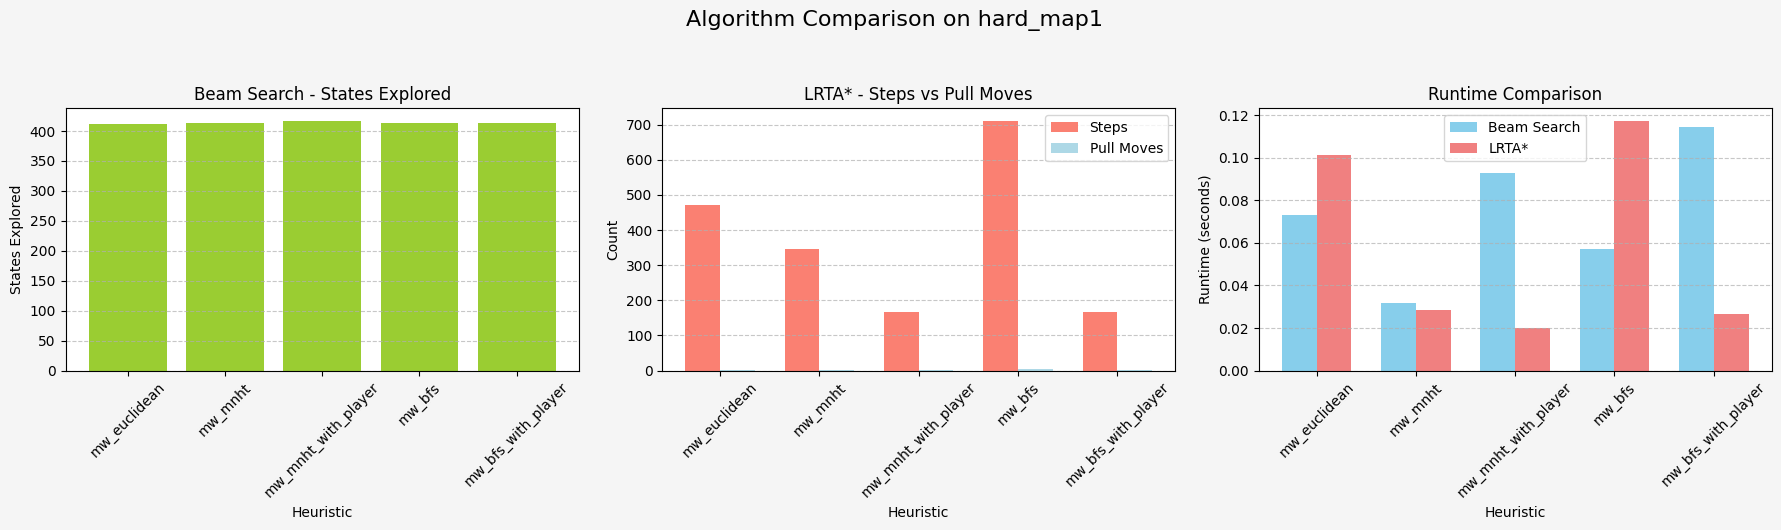

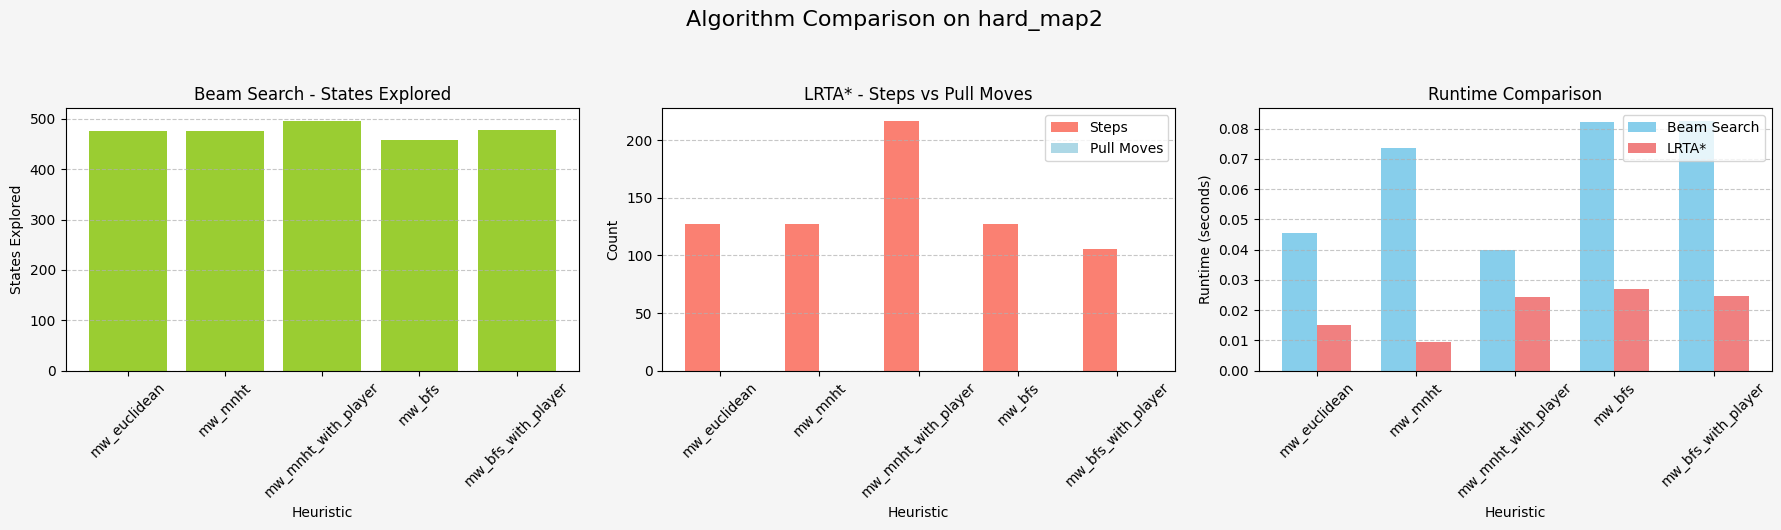

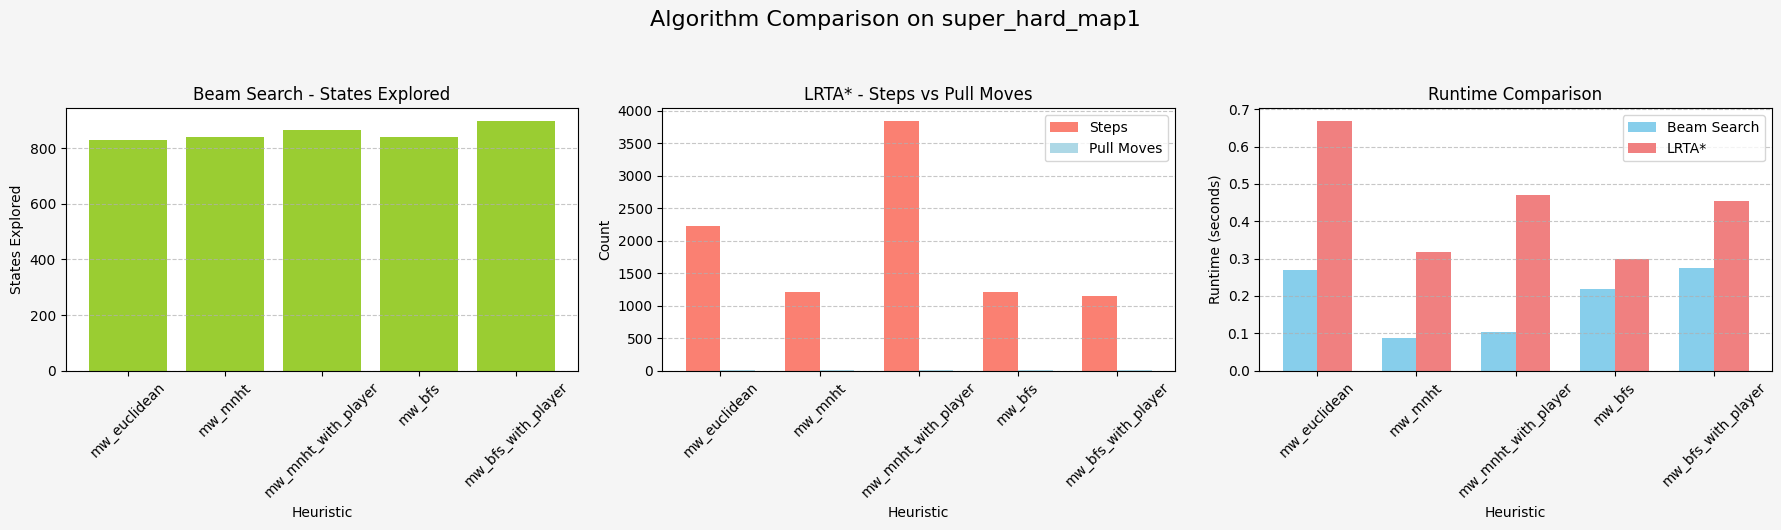

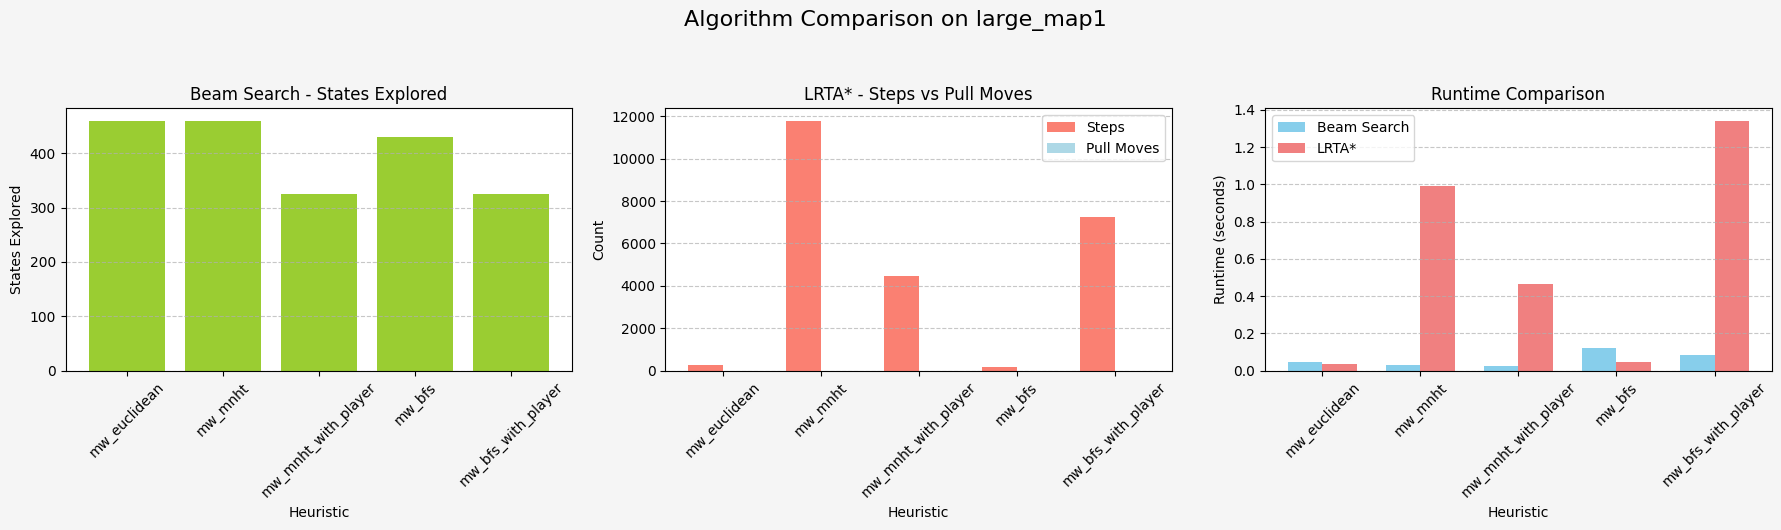

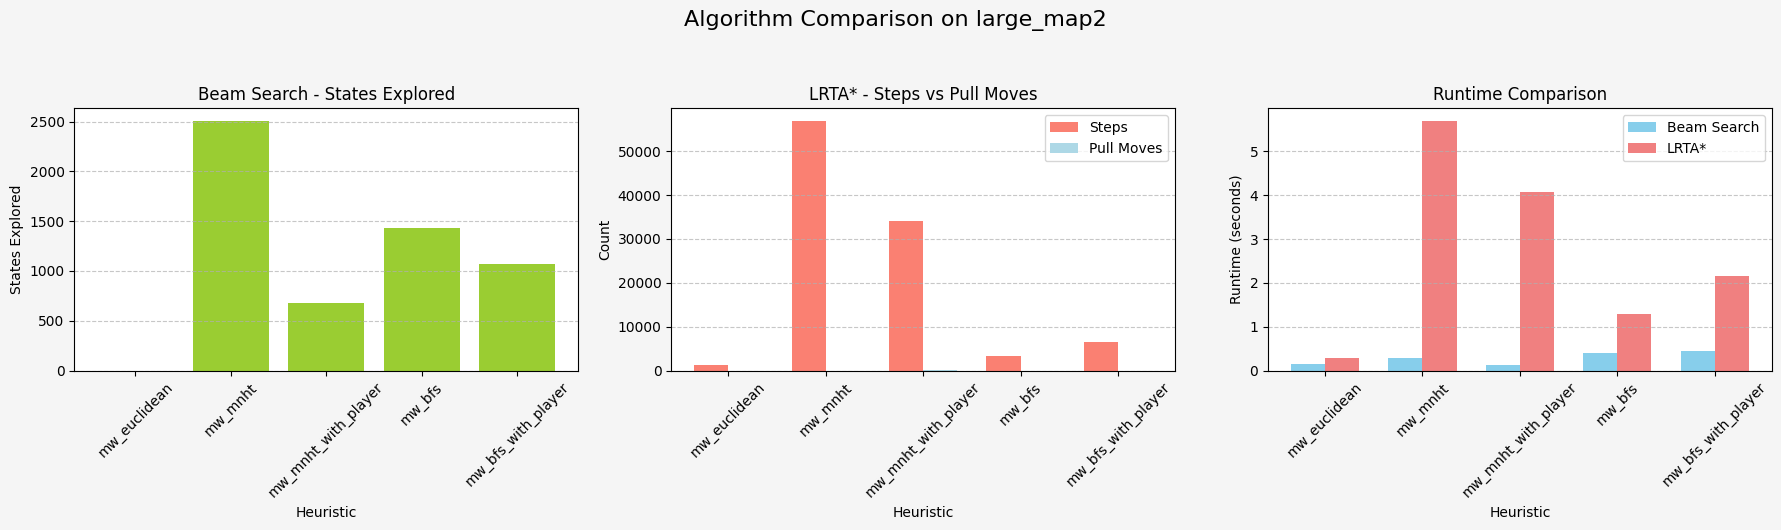

In [16]:
import numpy as np
import matplotlib.pyplot as plt

maps = ["easy_map1", "easy_map2", "medium_map1", "medium_map2", 
        "hard_map1", "hard_map2", "super_hard_map1", "large_map1", "large_map2"]

num_heuristics = len(heuristics)
# Shorten heuristic names for prettier plots
heuristics_names = [shorter.replace('manhattan', 'mnht') for shorter in 
                    [h.__name__.replace('min_weight', 'mw') for h in heuristics]]

for map_name in maps:
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))  # 1 row, 3 columns
    fig.suptitle(f'Algorithm Comparison on {map_name}', fontsize=16, y=1.05)
    fig.patch.set_facecolor('whitesmoke')

    # 1. Beam Search - States Explored
    axes[0].bar(heuristics_names, beam_search_explored_states[map_name], color='yellowgreen')
    axes[0].set_title('Beam Search - States Explored')
    axes[0].set_xlabel('Heuristic')
    axes[0].set_ylabel('States Explored')
    axes[0].grid(axis='y', linestyle='--', alpha=0.7)
    axes[0].set_facecolor('white')
    axes[0].tick_params(axis='x', rotation=45)

    # 2. LRTA* - Steps vs Pull Moves
    x = np.arange(num_heuristics)
    width = 0.35
    step_counts = lrta_star_total_steps[map_name]
    pull_counts = lrta_star_pull_moves[map_name]

    axes[1].bar(x - width/2, step_counts, width, label='Steps', color='salmon')
    axes[1].bar(x + width/2, pull_counts, width, label='Pull Moves', color='lightblue')
    axes[1].set_title('LRTA* - Steps vs Pull Moves')
    axes[1].set_xlabel('Heuristic')
    axes[1].set_ylabel('Count')
    axes[1].set_xticks(x)
    axes[1].set_xticklabels(heuristics_names, rotation=45)
    axes[1].legend()
    axes[1].grid(axis='y', linestyle='--', alpha=0.7)
    axes[1].set_facecolor('white')

    # 3. Runtime Comparison
    beam_times = [beam_search_runtimes[map_name][h.__name__] for h in heuristics]
    lrta_times = [lrta_runtimes[map_name][h.__name__] for h in heuristics]

    axes[2].bar(x - width/2, beam_times, width, label='Beam Search', color='skyblue')
    axes[2].bar(x + width/2, lrta_times, width, label='LRTA*', color='lightcoral')
    axes[2].set_title('Runtime Comparison')
    axes[2].set_xlabel('Heuristic')
    axes[2].set_ylabel('Runtime (seconds)')
    axes[2].set_xticks(x)
    axes[2].set_xticklabels(heuristics_names, rotation=45)
    axes[2].legend()
    axes[2].grid(axis='y', linestyle='--', alpha=0.7)
    axes[2].set_facecolor('white')

    plt.tight_layout()
    plt.show()
